## Load Library And Data

In [1]:
# importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to know the ecoding type
import chardet
with open('E:\\Recommendation System\\book.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7171222254531355, 'language': ''}

- The encoding standard used in the input file is ISO-8859-1
- Hence, to minimize the error while loading the input data, we are passing this encoding standard

In [3]:
# load the dataset 1
books_data = pd.read_csv('E:\\1_ExcelR_data\\0_assignmentsData\\10_Recommendation System\\book.csv', encoding='ISO-8859-1')
books_data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


## Data Cleaning And EDA

In [4]:
# drop unnecessary column
books_data.drop(['Unnamed: 0'], axis = 1, inplace=True)
books_data.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [5]:
books_data.sort_values(by=['User.ID'])

,User.ID,Book.Title,Book.Rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


In [6]:
# data dimenssion
books_data.shape

(10000, 3)

In [7]:
# data description
books_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User.ID,10000.0,95321.2498,117645.703609,8.0,2103.0,3757.0,162052.0,278854.0
Book.Rating,10000.0,7.5663,1.821520,1.0,7.0,8.0,9.0,10.0


In [8]:
# dataframes types
books_data.dtypes

User.ID         int64
Book.Title     object
Book.Rating     int64
dtype: object

In [9]:
# informartion of the data
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
User.ID        10000 non-null int64
Book.Title     10000 non-null object
Book.Rating    10000 non-null int64
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


- No null values
- two features are numeric
- one feature is categorical

In [10]:
books_data.describe()['Book.Rating']

count    10000.00000
mean         7.56630
std          1.82152
min          1.00000
25%          7.00000
50%          8.00000
75%          9.00000
max         10.00000
Name: Book.Rating, dtype: float64

- max rating = 10
- min rating = 1
- average rating = 7.5

In [11]:
# find the minimum and maximum ratings
print('Minimum rating is:', (books_data['Book.Rating'].min()))
print('Maximum rating is:', (books_data['Book.Rating'].max()))

Minimum rating is: 1
Maximum rating is: 10


- Most of the books are getting max ratings as 8
- Minimum ratings as 1 are very few books

In [13]:
# Unique Users and ratings
print("Total data \n")
print("Total no of ratings   :",books_data.shape[0])
print("Total No of Users     :", len(np.unique(books_data['User.ID'])))
print("Total No of products  :", len(np.unique(books_data['Book.Rating'])))

Total data 

Total no of ratings   : 10000
Total No of Users     : 2182
Total No of products  : 10


In [14]:
# find out the average rating for each and every books
Average_ratings = pd.DataFrame(books_data.groupby('Book.Title')['Book.Rating'].mean())
Average_ratings.head(3)

,Book.Rating
Book.Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0


- Average ratings received by readers as,

1) 8.0 - Jason, Madison &amp


2) 6.0 - Other Stories;Merril;1985;McClelland &amp


3) 4.0 - Repairing PC Drives &amp	

## Visualize The Data

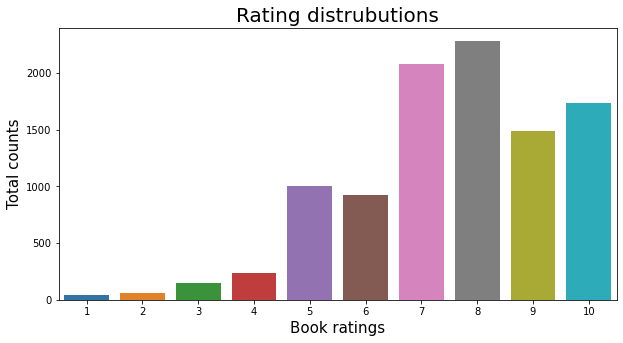

In [12]:
# Check the distribution of the rating
plt.figure(figsize=(10, 5))
sns.countplot("Book.Rating", data = books_data)
plt.title('Rating distrubutions', fontsize = 20)
plt.xlabel("Book ratings", fontsize = 15)
plt.ylabel("Total counts", fontsize = 15)
plt.show()

## Building The Recommender

In [15]:
# make pivot table
book_users = books_data.pivot_table( index='User.ID', columns = books_data['Book.Title'], values='Book.Rating')
book_users

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [32]:
# find correlation between "10 Commandments Of Dating" and other books
book_read = book_users["10 Commandments Of Dating"]
similarity_with_other_books = book_users.corrwith(book_read)  
similarity_with_other_books = similarity_with_other_books.sort_values(ascending=False)
similarity_with_other_books.head(10)

Book.Title
The Foot Book (Nifty Lift-And-Look Books)                                                     1.0
The Postcard                                                                                  1.0
Glasses for D.W. (Step-Into-Reading, Step 3)                                                  1.0
The Shoe Box: A Christmas Story                                                               1.0
Chronicles of Fairacre, Comprising Village School, Village Diary, and Storm in the Village    1.0
What's a Christian to Do with Harry Potter?                                                   1.0
I Kissed Dating Goodbye: A New Attitude Toward Relationships And Romance                      1.0
The Berenstain Bears and the Bad Dream (First Time Books)                                     1.0
What I Wish I'd Known Before I Got Married                                                    1.0
The Lust Lizard of Melancholy Cove                                                            1.0
dtype: fl

In [17]:
# imputer NaN with 0
book_users.fillna(0, inplace = True)
book_users

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [18]:
# collecting unique user id
book_users.index = books_data['User.ID'].unique()
book_users.head()

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Computation with Cosine Distance

In [19]:
# calculating Cosine Similarities between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [20]:
# Cosine similarities values (using distance matrics)
user_sim = 1 - pairwise_distances(book_users.values, metric = 'cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [21]:
# store the result (Cosine Similarities values) in a dataframe
user_similarity_df = pd.DataFrame(user_sim)

In [22]:
user_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
# set the index and columns to userId
user_similarity_df.index = books_data['User.ID'].unique()
user_similarity_df.columns = books_data['User.ID'].unique()

In [24]:
books_data

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [25]:
user_similarity_df.iloc[0:7, 0:7]

,276726,276729,276736,276737,276744,276745,276747
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
np.fill_diagonal(user_sim, 0)
user_similarity_df.iloc[0:7, 0:7]

,276726,276729,276736,276737,276744,276745,276747
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Most Similarity

In [27]:
# Most similar readers
user_similarity_df.idxmax(axis = 1)[0:20]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
276745    276726
276747    276726
276748    161677
276751    276726
276754    276726
276755    276726
276760    276726
276762    276726
276768    276726
276772      1491
276774    278543
276780    276726
276786    276726
276788    276726
276796    276726
dtype: int64

In [28]:
# find out book read by two users 276780 and 276726
books_data[(books_data['User.ID'] == 276780) | (books_data['User.ID'] == 276726)]

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
26,276780,Wild Animus,7
27,276780,Airframe,7


In [29]:
# user 276780 books
user_276780 = books_data[books_data['User.ID'] == 276780]
user_276780

,User.ID,Book.Title,Book.Rating
26,276780,Wild Animus,7
27,276780,Airframe,7


In [30]:
# user 276726 books
user_276726 = books_data[books_data['User.ID'] == 276726]
user_276726

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5


## Recommendations

In [31]:
# meging two user book data into single one
pd.merge(user_276780, user_276726, on = 'Book.Title', how = 'outer')

,User.ID_x,Book.Title,Book.Rating_x,User.ID_y,Book.Rating_y
0,276780.0,Wild Animus,7.0,NaN,NaN
1,276780.0,Airframe,7.0,NaN,NaN
2,NaN,Classical Mythology,NaN,276726.0,5.0


- User __176780__ read two books titled __'Wild Animus'__ and __'Airframe'__ which is rated as __7.0__
- User __276726__ read only one book titled __'Classical Mythology'__ which is rated as __5.0__
- So based on ratings given by readers, _the book 'Classical Mythology' is recommended to User 176780 and the books 'Wild Animus' and 'Airframe' are recommended to User 276726_